# Lab 06 - Ohm's Law (Part 2)

Edit this cell and provide the information requested:

- Your name:
- Your student number:
- Partner's name:

In [1]:
import numpy as np
import data_entry
import matplotlib.pyplot as plt

## Part A - Intro & Learning Activities

***After reviewing and hearing feedback from the last lab, write some notes below about what you learned/what you could improve for this week.***

***Write notes below about the new tool we derived in the learning activity.***

- $\chi_w^2$ (weighted chi-squared) is a goodness of fit parameter; it is defined as:
$$\chi_w^2 = \frac{1}{N-P}\sum_{i=1}^N \left(\frac{y_i - f(y_i)}{u[y_i]}\right)^2$$
    where $N$ is the number of datapoints and $P$ is the number of model parameters.
- Two-step process of minimizing chi-squared (which corresponds to finding the best model parameters to fit the data) and then interpreting the value for goodness of fit.
    - $\chi_w^2 \approx 1$: The model fits the data well, assuming uncertainties have been characterized well
    - $\chi_w^2 \gg 1$: Not a good fit or the uncertainties have been underestimated
    - $\chi_w^2 \ll 1$: The uncertainties have been overestimated
- Still use residuals in addition to $\chi_w^2$. After minimizing, residuals indicate a good fit if:
    - $\sim 2/3$ of measurements within $1\sigma$ of the residuals zero-line
    - Almost all (95%) within $2\sigma$ of the residuals zero line
    - No trend in the data (data seems randomly scattered about the residuals zero line

## Part B - Revisiting the fit to last week's data

- ***Using the new tool introduced in Part A, revisit last week’s data. Calculate the new goodness of fit statistic and see if you can further optimize your fit from last time.***
- ***What is your revised best estimate of the resistance of your resistor?***
- ***What can you conclude about whether the model describes the data?***

In [2]:
de = data_entry.sheet_copy("../Lab05/lab05_data.csv", "lab06_data.csv")

Creating directory for backups:  csv_backups/
Creating undo file
Sheet name: lab06_data.csv


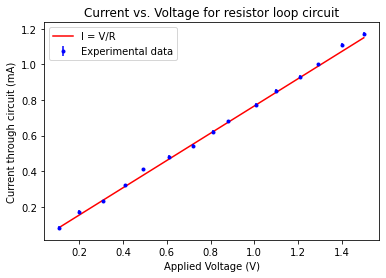

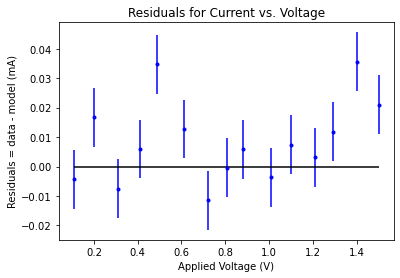

2.749963714285712


In [3]:
# Scatterplot and Model
# Step 1: find the limits of the data:
xmin = np.min(VVec) # use the np.min function to find the smallest x value
xmax = np.max(VVec) # same for max

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax

# Step 3: calculate the model values:
slope = 0.766 # Estimate of the slope.
ypoints = xpoints * slope # this calculates the yvalues at all 200 points.

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "I = V/R")

# What's below is exactly what we had earlier:
plt.errorbar(VVec, IVec, uIVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Current vs. Voltage for resistor loop circuit")
plt.xlabel("Applied Voltage (V)")
plt.ylabel("Current through circuit (mA)")
plt.legend()
plt.show()

# Residuals Plot
# Step 1: Calculate the model at each x-datapoint
ymodel = slope * VVec # y = mx at each x_i

# Step 2: Calcualte the residual vector
RVec = IVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(VVec, RVec, uIVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Current vs. Voltage")
plt.xlabel("Applied Voltage (V)")
plt.ylabel("Residuals = data - model (mA)")
plt.show()

# chi-squared calculation
N = len(IVec)
P = 1
weightedsquaredresVec = (RVec/uIVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print(chisquared)

Last time we had an optimal slope of $m = 0.77$ ($R = 1/0.77*1000 =1298\Omega$). This corresponded to a $\chi_w^2$ of 2.15. Minimizing $\chi_w^2$, we find that $m = 0.7764$ ($R = 1/0.7764*1000 =1288\Omega$) gives us the minimum $\chi_w^2 = 1.79$. Since $\chi_w^2 \sim 1$ we would conclude that the model is a reasonable fit to the data. The residuals also support this, with no obvious trend, about two thirds (~68%) of error bars crossing the $x = 0$ line, and almost all of the points hitting $x = 0$ within $2\sigma$.

We find that $\chi_w^2 = 2.79$ (one more than the minimum value of $1.79$) when $m_{\text{max}} = 0.787$ and $m_{\text{\min}} = 0.766$. From this we conclude the uncertainty in the slope to be: 

$$u[m] = \frac{m_{\text{max}} - m_{\text{min}}}{2} = \frac{0.787 - 0.766}{2} = 0.0105 \sim 0.011$$

so the uncertainty in the resistance is:

$$u[R] = R * \frac{u[m]}{m} = 18\Omega$$.

So our improved value of the resistance of the resistor from last lab is $R = 1288 \pm 18 \Omega$.

## Part C -  Familiarize Part I (Build your circuit)

***Include below any notes useful for building the circuit***

- As we investigated in the last lab, Ohm's law says the current through a device is proportional to the voltage through it; $I = V/R$. It is not a law of nature, but an empirical rule that many observations have been found to obey.
- **Experimental Goal:** Repeat the above fitting and analysis procedure that we did for the resistor to investigate the current-voltage properties of a lightbulb, and see if Ohm's law is obeyed.
- Circuit: Loop containing the voltage source, lightbulb, and resistor.
- Multimeter:
    - Voltmeter/DC Voltage: Set to DC Voltage (one single range for the set of measurements) and connect the voltmeter in parallel with the device being measured (using the V and COM terminals); in this case the lightbulb.
    - Ammeter/DC Current: Set to DC Current (one single range for the set of measurements) and connect the ammeter in series with the circuit (using the 200mA and COM terminals).
- Power Supply: Use Red (+) and Black (-) terminals

## Part D - Familiarize Part II (Explore)

***Explore the operation of the circuit. What ranges should you set the multimeters to? Why did you choose those ranges? Once you’ve chosen ranges, stick with them!***

- Voltage causes the power supply to produce a voltage difference of X Volts across it. Current causes the power supply to output a current of Y amps.
- We make current and voltage measurements - we find that an appropriate range for the Voltmeter is (min-max) V (as this is what we find the voltage range across the bulb to be when we vary the voltage from the power supply) and the appropriate range for the Ammeter is (min-max) mA (as this is the range of output currents for the optimal voltage range). We will use these ranges for the rest of the day.
- Readings of voltage and current across the lightbulb are stable/unstable.
- (If readings in voltage/current are stable), uncertainty in voltage/current is instrumental/described by square PDF(stable fixed reading from a measurement device).  Use half of the most significant digit divided by $\sqrt{3}$ to obtain the uncertainty. 
- (If readings in voltage/current are unstable), uncertainty in voltage/current are best described by a Gaussian PDF. Determine the measurement value by the mean of the fluctuating values, and the uncertainty by taking the range of the fluctuations as the 95% confidence interval and dividing by 4.

## Part E - Measure, Analyze, Reflect

***Create a new spreadsheet for this week’s new data, and collect current and voltage measurements for the light bulb. Make a scatterplot with model. Use the residuals plot and the new goodness-of-fit statistic to find the best fit to the $I = (1/R)V$ model predicted by Ohm's law.***
- ***How do your results for the lightbulb compare with those for the resistor?***
- ***How do your results compare with other groups at your table?***

Note: Data below is totally fabricated

In [4]:
de2 = data_entry.sheet("lab06_data2.csv")
# VVec * 0.22 - VVec**2 * 0.03

Creating undo file
Sheet name: lab06_data2.csv


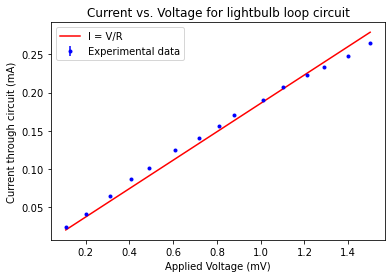

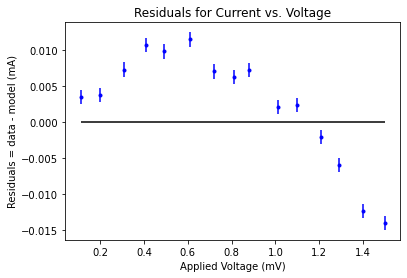

69.29408571428571


In [5]:
# Scatterplot and Model
# Step 1: find the limits of the data:
xmin = np.min(VVec) # use the np.min function to find the smallest x value
xmax = np.max(VVec) # same for max

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax

# Step 3: calculate the model values:
slope = 0.186 # Estimate of the slope.
ypoints = xpoints * slope # this calculates the yvalues at all 200 points.

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "I = V/R")

# What's below is exactly what we had earlier:
plt.errorbar(VVec, IVec, uIVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Current vs. Voltage for lightbulb loop circuit")
plt.xlabel("Applied Voltage (mV)")
plt.ylabel("Current through circuit (mA)")
plt.legend()
plt.show()

# Residuals Plot
# Step 1: Calculate the model at each x-datapoint
ymodel = slope * VVec # y = mx at each x_i

# Step 2: Calcualte the residual vector
RVec = IVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(VVec, RVec, uIVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Current vs. Voltage")
plt.xlabel("Applied Voltage (mV)")
plt.ylabel("Residuals = data - model (mA)")
plt.show()

# chi-squared calculation
N = len(IVec)
P = 1
weightedsquaredresVec = (RVec/uIVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print(chisquared)

We find that $m = 0.186$ minimizes $\chi_w^2$ with $\chi_w^2 = 69.2$. Since $\chi_w^2 \gg 1$, either we have underestimated our uncertainties or the model is not a good fit. From the residuals graph, we conclude the latter; we see that there is an obvious nonlinear (perhaps parabolic) trend in the residuals. We would therefore conclude that a linear model is not appropriate to fit this dataset, and therefore that the lightbulb we are using cannot be well-described by Ohm's law. It is therefore not particularly meaningful to apply Ohm's law to extract the resistance (and its uncertainty) to the current dataset.

Although it isn't super well-defined to obtain the resistance from the above analysis, we have (assuming Ohm's law falsely holds) that $R = 1/m = 5.37 \Omega$ for the lightbulb; much lower than the resistor. Qualitatively comparing with other groups, we find that other groups also have similarly non-linear datasets and are struggling to fit a linear model; we do find that the "best fit slopes" they find are on a similar order of magnitude, however. We will brainstorm and do a more quantitative comparison when we are able to find a more concrete value for the resistance.

## Part F - Iterate and Improve

***Brainstorm, justify, and (time permitting) execute improvements to your measurement.***

Looking at the above dataset, we observe that while the data is non-linear, it looks linear for lower voltages. We therefore hypothesize that the lightbulb may follow Ohm's law for low voltages, but becomes non-Ohmic at lower voltages. We therefore propose the improvement that we take more datapoints in the linear region, and try to fit the linear model selectively there.

In [6]:
de3 = data_entry.sheet("lab06_data3.csv")

Creating undo file
Sheet name: lab06_data3.csv


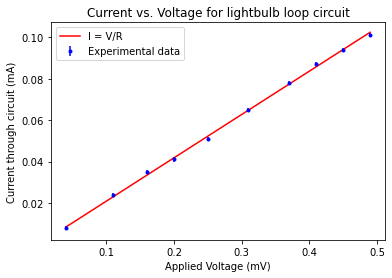

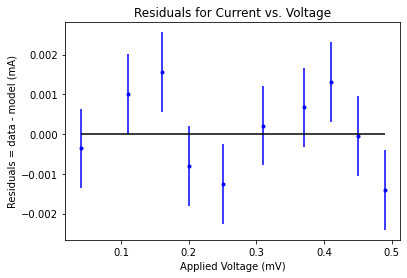

1.1094999999999988


In [7]:
# Scatterplot and Model
# Step 1: find the limits of the data:
xmin = np.min(VVec) # use the np.min function to find the smallest x value
xmax = np.max(VVec) # same for max

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax

# Step 3: calculate the model values:
slope = 0.209 # Estimate of the slope.
ypoints = xpoints * slope # this calculates the yvalues at all 200 points.

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "I = V/R")

# What's below is exactly what we had earlier:
plt.errorbar(VVec, IVec, uIVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Current vs. Voltage for lightbulb loop circuit")
plt.xlabel("Applied Voltage (mV)")
plt.ylabel("Current through circuit (mA)")
plt.legend()
plt.show()

# Residuals Plot
# Step 1: Calculate the model at each x-datapoint
ymodel = slope * VVec # y = mx at each x_i

# Step 2: Calcualte the residual vector
RVec = IVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(VVec, RVec, uIVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Current vs. Voltage")
plt.xlabel("Applied Voltage (mV)")
plt.ylabel("Residuals = data - model (mA)")
plt.show()

# chi-squared calculation
N = len(IVec)
P = 1
weightedsquaredresVec = (RVec/uIVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print(chisquared)

We find that $m = 0.209$ minimizes $\chi_w^2$ with $\chi_w^2 = 1.11$. Since $\chi_w^2 \sim 1$, we conclude that (so long as our uncertainties are reasonably estimated) the model is a good fit. Our residuals support this conclusion; we see no obvious trend, with equal scatter above/below the x-axis and approximately ~68% of error bars crossing the $x = 0$ line.

Our hypothesis that the Ohm's law holds well in the small-voltage region seems to be correct; we see that the linear model indeed works well when selectively fit on this region of the data.

We find that $\chi_w^2 = 2.11$ (one more than $1.11$) when $m_{\text{max}} = 2.212$ and $m_{\text{min}} = 2.206$. We therefore estimate the uncertainty in the slope as:

$$u[m] = \frac{m_{\text{max}} - m_{\text{min}}}{2} = \frac{2.212 - 2.206}{2} = 0.003$$.

The resistance of the bulb is given by: $R = 1/0.209 = 4.785 \Omega$. The uncertainty in the resistance is given by $u[R] = R * u[m]/m = 0.069 \Omega$. So we conclude that the resistance of the bulb in the low-voltage region is $R = 4.785 \pm 0.069 \Omega$.

Doing a t-score of the low-voltage resistance with the resistance of the resistor, we find that $t = 71 \gg 3$ so we are confident that the values are different. This makes sense as they are distinct objects, and there is no reason that the incandecent lightbulb would have an identical resistance to the resistor. 

Another group (Feynman and Dirac) also tried fitting selectively in the linear region, and found that $R = 4.912 \pm 0.052 \Omega$. Doing a t-score we find that $t = 1.47$. This is in between 1 and 3 so the values are in tension. We would expect that the low-voltage resistances should be similar (as we are working with bulbs that to be of identical brands) but it is also possible that there are small measurable deviations in the resistances between different bulbs. A more precise measurement of the resistance could potentially reveal this difference.

## Part G - Completing the Lab

***Tips:***
- ***A brief summary of how your key results and the results of your analysis and comparisons evolved throughout the lab.***
- ***1-2 sentences to describe and justify your major improvements and how they proved to be successful or unsuccessful. It may be helpful to use relative uncertainty to quantify your argument.***
- ***1-2 sentences addressing the experimental goal and describing the conclusions you can make from the results of your comparisons.***
- ***1 sentence containing your thoughts for further investigation. If you were to spend more time with this experiment, what would you plan to do next?***

Through this lab, we have found that the resistor follows Ohm's law across a wide range of input voltages, while the lightbulb displays a non-linear current-voltage curve and does not follow Ohm's law for general voltages. However, we have found that the lightbulb is Ohmic in the low-voltage region. Through linear fitting and $\chi_w^2$ minimization, we have found that the resistance of the resistor is $R = 1288 \pm 18 \Omega$ and the low-voltage resistance of the bulb is $R = 4.785 \pm 0.069 \Omega$. These results were found to be quantitatively consistent with other groups through t-score comparison.

Our improvement in this lab was to limit the range of fitting the linear model to the bulb current-voltage data (to small voltages) and to take more points in that region. This was a successful improvement as we were able to confirm our conjecture that the bulb is Ohmic for small voltages, as shown by our decreased $\chi_w^2$ (from 69.2 when fit over the entire range to 1.1 when fit over small voltages) and residual plots.

Further investigations could improve the model to be fit; we could try to fit a model function with higher order polynomial terms (e.g. quadratic) to better capture and quantify the non-linearity of the bulb displayed at larger voltages.